In [1]:
from matplotlib import pyplot as plt
import pytesseract
import cv2
import numpy as np
import pandas as pd
import os
import shutil

# psm 6 = Assume a single uniform block of text.
config_tesseract = '--tessdata-dir ./ttesseract_langs --psm 6 digits'

In [2]:
file_path = "./manually_cropped/"
manually_cropped_files = os.listdir(file_path)

In [3]:
def show_img(img, size=12, title=None):
    fig = plt.gcf()
    fig.set_size_inches(size, size)
    plt.axis("off")
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

In [4]:
def read_resize_data(input_file, size=160):
    # img = cv2.imread(input_file)
    img = input_file
    # width = 300
    # height = 300
    width = size
    height = size
    dim = (width, height)

    # resize image
    # resized = cv2.resize(input_file, dim, interpolation = cv2.INTER_AREA)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    return resized

In [5]:
def get_text(image):

    # Read text from image using Seven Segment training data
    text_ssd = pytesseract.image_to_string(image, lang="ssd", config=config_tesseract)

    # Read text from image using English character training data
    text_eng = pytesseract.image_to_string(image, lang="eng", config=config_tesseract)
    
    # Clean text
    text_ssd = ''.join(c for c in text_ssd if c.isdigit() or c == '.' or c == '-')
    text_eng = ''.join(c for c in text_eng if c.isdigit() or c == '.' or c == '-')

    return text_ssd, text_eng


In [9]:
def crop_image(img, top=0, bottom=0, left=0, right=0):
    """
    Crop an image on all sides, only if there is a value for top, bottom, right, and left.
    
    Parameters:
        img (numpy.ndarray): The image to be cropped.
        top (int, optional): The number of pixels to be cropped from the top. Default is 0.
        bottom (int, optional): The number of pixels to be cropped from the bottom. Default is 0.
        left (int, optional): The number of pixels to be cropped from the left. Default is 0.
        right (int, optional): The number of pixels to be cropped from the right. Default is 0.
        
    Returns:
        numpy.ndarray: The cropped image.
    """
    # Check if there is a value for each side
    if top:
        img = img[top:, :]
    if bottom:
        img = img[:-bottom, :]
    if left:
        img = img[:, left:]
    if right:
        img = img[:, :-right]
        
    return img


27
mancrop_1.jpg


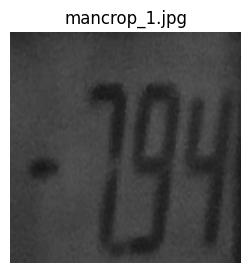

text output is :- ssd :- -194
 <--
mancrop_10.jpg


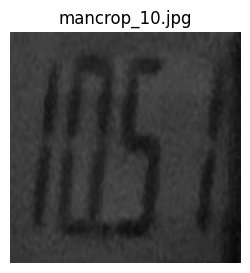

text output is :- ssd :- 1051
 <--
mancrop_11.jpg


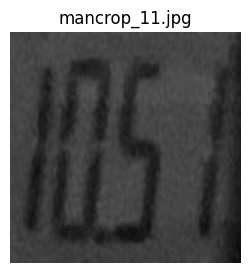

text output is :- ssd :- 1051
 <--
mancrop_12.jpg


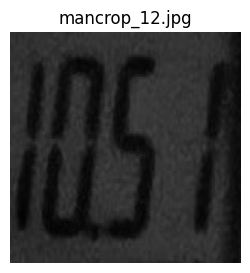

text output is :- ssd :- 1051
 <--
mancrop_13.jpg


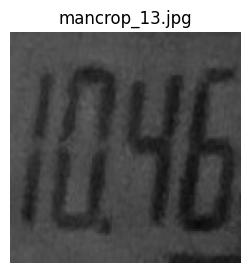

text output is :- ssd :- 1046
 <--
mancrop_14.jpg


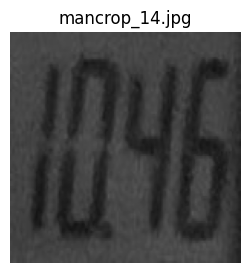

text output is :- ssd :- 1046
 <--
mancrop_15.jpg


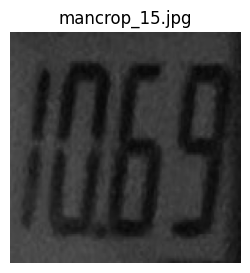

text output is :- ssd :- 1069
 <--
mancrop_16.jpg


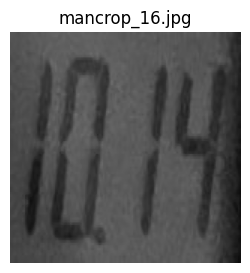

text output is :- ssd :- 1014
 <--
mancrop_17.jpg


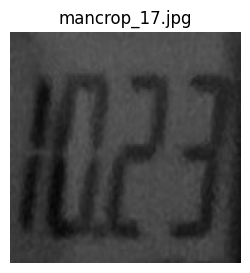

text output is :- ssd :- 1023
 <--
mancrop_18.jpg


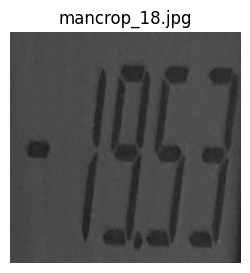

text output is :- ssd :- -19453
 <--
mancrop_19.jpg


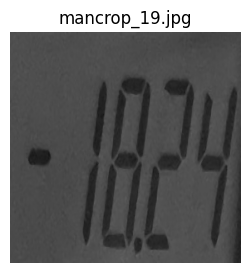

text output is :- ssd :- - 113.311
101.4 1
 <--
mancrop_2.jpg


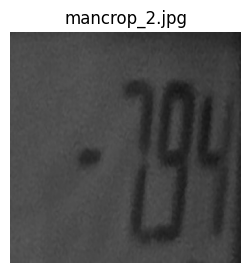

text output is :- ssd :-  <--
mancrop_20.jpg


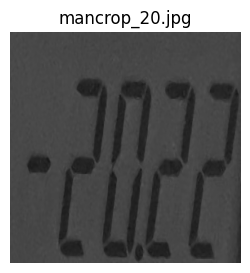

text output is :- ssd :- -2022
 <--
mancrop_21.jpg


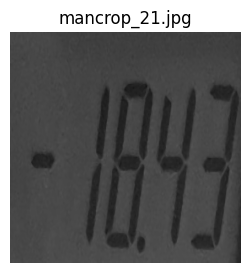

text output is :- ssd :- 1843
 <--
mancrop_22.jpg


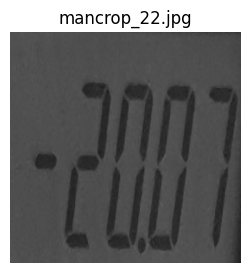

text output is :- ssd :- 317177
0014/11
 <--
mancrop_23.jpg


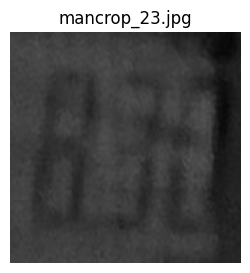

text output is :- ssd :- 7: 4
8.11
 <--
mancrop_24.jpg


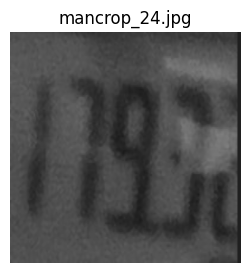

text output is :- ssd :- 1195
 <--
mancrop_25.jpg


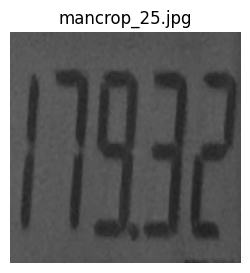

text output is :- ssd :- 11932
 <--
mancrop_26.jpg


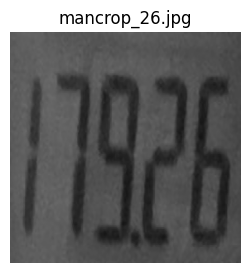

text output is :- ssd :- 11926
 <--
mancrop_27.jpg


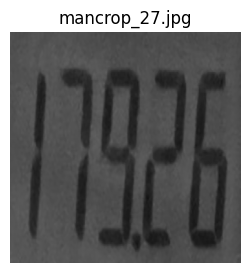

text output is :- ssd :- 11926
 <--
mancrop_3.jpg


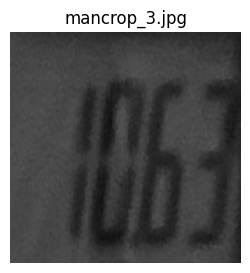

text output is :- ssd :-  <--
mancrop_4.jpg


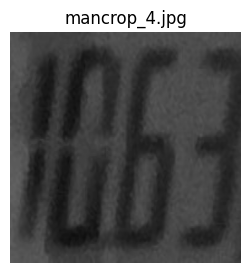

text output is :- ssd :- 1063
 <--
mancrop_5.jpg


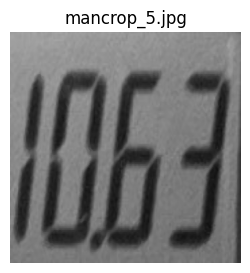

text output is :- ssd :- 1063
 <--
mancrop_6.jpg


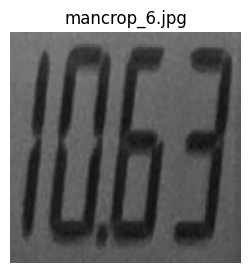

text output is :- ssd :- 1063
 <--
mancrop_7.jpg


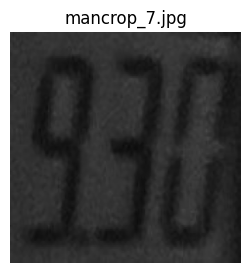

text output is :- ssd :- 930
 <--
mancrop_8.jpg


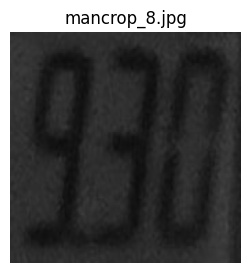

text output is :- ssd :- 930
 <--
mancrop_9.jpg


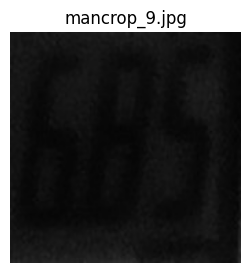

text output is :- ssd :- 4444.47
88816241
 <--


In [29]:
print(len(manually_cropped_files))
for filename in manually_cropped_files:
    print(filename)

    image = cv2.imread(file_path + filename)

    if filename == "mancrop_4.jpg":
        image = crop_image(image, top=0, bottom=0, left=0, right=14)
        
    if filename == "mancrop_13.jpg":
        image = crop_image(image, top=0, bottom=0, left=0, right=14)
        
    

    img = read_resize_data(image, 400) 
    # show_img(image, 3)
    # Pre-processing for tesseract
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.medianBlur(gray, 3)
    show_img(gray, 3, title=filename)

    # Run tesseract OCR on the image
    
    text_ssd = pytesseract.image_to_string(image, lang="ssd", config=config_tesseract)
    

    # Print the extracted text
    print("text output is :- ssd :-" , text_ssd,  "<--")

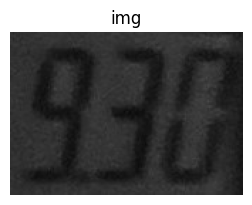

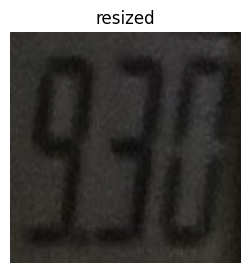

930


In [9]:
image = "./manually_cropped/mancrop_7.jpg"

# Read the image
img = cv2.imread(image, 0)
resized = read_resize_data(image, 200)
show_img(img, 3, title="img")
show_img(resized, 3, title="resized")

thresh = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (1, 5))
thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
thresh = cv2.threshold(thresh, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
text_ssd, text_eng = get_text(thresh)

# show_img(thresha, 3)
# show_img(threshb, 3)
# show_img(threshc, 3)

print(text_ssd)

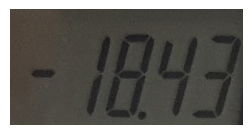

.7



In [18]:
image = "./manually_cropped/mancrop_21.jpg"

# Read the image
img = cv2.imread(image)
show_img(img, 3)
# Pre-processing for tesseract
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.medianBlur(gray, 3)

# Provide a custom config file to tesseract
custom_config = r'--oem 3 --psm 6 digits'
text = pytesseract.image_to_string(gray, config=custom_config)

# Print the extracted text
print(text)

In [15]:

image = "./manually_cropped/mancrop_21.jpg"

# Get image data
# img = read_input_data(input_file)
img = read_resize_data(image)

# Convert to RGB (three dimensions)
nimRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to gray (one dimension)
nimGray = cv2.cvtColor(nimRGB, cv2.COLOR_BGR2GRAY)

# 255 is a value that is going to be assigned to respectively pixels in the result 
# (namely, to all pixels which value in the source is greater then computed threshold level)
max_threshold = 255


adaptive_gaussian = cv2.adaptiveThreshold(nimGray, max_threshold, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 9)

# Get Text for Seven Segment and English
# text_ssd, text_eng = get_text(adaptive_gaussian)


show_img(adaptive_gaussian, 3)


TypeError: Expected Ptr<cv::UMat> for argument 'src'

In [11]:
image = "./manually_cropped/mancrop_21.jpg"
# Get image data
# img = read_input_data(input_file)
img = read_resize_data(image)

# Convert to RGB (three dimensions)
nimRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to gray (one dimension)
nimGray = cv2.cvtColor(nimRGB, cv2.COLOR_BGR2GRAY)

# Coordinates on the x and y axis
scale_size = 0.1

# Block size pf a pixel neighbourhood that is used to calculate a threshold value for the pixel
pixel_block_size = 11

# Constant subtracted from the mean or weighted mean. (Normally it is positive but can be 0 or negative) - default here is 9
constant_to_subtract = 9

# Adaptive Average
adaptive_average = cv2.adaptiveThreshold(nimGray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, pixel_block_size, constant_to_subtract)

# Invert Adaptive Average
invert = 255 - adaptive_average

# Dilation
open_invert = cv2.dilate(invert, np.ones((3,3), np.uint8))

# Decrease size to 0.1
decrease = cv2.resize(open_invert, None, fx = scale_size, fy = scale_size, interpolation = cv2.INTER_AREA)

show_img(nimGray, 3)
show_img(adaptive_average, 3)

# text_ssd, text_eng = get_text(decrease)
# return text_ssd, text_eng

TypeError: Expected Ptr<cv::UMat> for argument 'src'

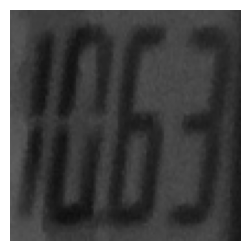

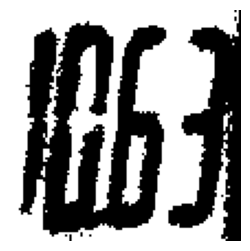

1063


In [18]:
image = "./manually_cropped/mancrop_4.jpg"

# Get image data
# img = read_input_data(input_file)
img = read_resize_data(image, 105)

# Convert to RGB (three dimensions)
nimRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert to gray (one dimension)
nimGray = cv2.cvtColor(nimRGB, cv2.COLOR_BGR2GRAY)

# Set the minimum to gray and max to white
min_threshold = 55
max_threshold = 255

# Binary Thresh
value, nimThresh = cv2.threshold(nimGray, min_threshold, max_threshold, cv2.THRESH_BINARY)

show_img(nimGray, 3)
show_img(nimThresh, 3)

# Get Text for Seven Segment and English
text_ssd, text_eng = get_text(nimThresh)

print(text_ssd)

# return text_ssd, text_eng
